In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import pandas as pd

Mounted at /content/drive


In [ ]:
def apk(actual, predicted, k=10):
    actual = list(map(int, actual))
    predicted = list(map(int, predicted))

    predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted, start=1):
        if p in actual and p not in predicted[:i-1]:
            num_hits += 1.0
            score += num_hits / i

    return score / min(len(actual), k)

In [ ]:
def precision_at_k(actual, predicted, k=10):
    actual = list(map(int, actual))
    predicted = list(map(int, predicted))
    predicted = predicted[:k]
    hits = len(set(predicted) & set(actual))
    return hits / k

def recall_at_k(actual, predicted, k=10):
    actual = list(map(int, actual))
    predicted = list(map(int, predicted))
    predicted = predicted[:k]
    hits = len(set(predicted) & set(actual))
    return hits / len(actual) if actual else 0

def f1_at_k(actual, predicted, k=10):
    actual = list(map(int, actual))
    predicted = list(map(int, predicted))
    precision = precision_at_k(actual, predicted, k)
    recall = recall_at_k(actual, predicted, k)
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

In [ ]:
def hit_at_k(actual, predicted, k=10):
    actual = list(map(int, actual))
    predicted = list(map(int, predicted))
    predicted = predicted[:k]
    return int(any(item in actual for item in predicted))

In [ ]:
def calculate_and_print_metrics(name, pred_file, a=0):
    print(f"Metrics for {name}:")
    df_prediction = pd.read_csv(pred_file)
    df_ground_truth = pd.read_csv(name)
    grouped_df = df_ground_truth.groupby('customer_id')['article_id'].apply(list).reset_index()
    if a == 0:
      df_prediction['prediction'] = df_prediction['prediction'].apply(lambda x: x.split())
    if a == 1:
      df_prediction['prediction'] = df_prediction[["recommendations_1", "recommendations_2", "recommendations_3", "recommendations_4","recommendations_5","recommendations_6","recommendations_7","recommendations_8","recommendations_9","recommendations_10","recommendations_11","recommendations_12"]].values.tolist()

      df_prediction = df_prediction[["customer_id", "prediction"]]

    common_customers = set(grouped_df['customer_id']).intersection(set(df_prediction['customer_id']))
    ground_truth = grouped_df[grouped_df['customer_id'].isin(common_customers)]
    predictions = df_prediction[df_prediction['customer_id'].isin(common_customers)]
    ground_truth = ground_truth.sort_values('customer_id').reset_index(drop=True)
    predictions = predictions.sort_values('customer_id').reset_index(drop=True)
    k = 12
    mapk_score = sum(apk(gt, pred, k) for gt, pred in zip(ground_truth['article_id'], predictions['prediction'])) / len(common_customers)
    print("mapk", mapk_score)
    k = 12
    f1_scores = [
        f1_at_k(gt, pred, k)
        for gt, pred in zip(ground_truth['article_id'], predictions['prediction'])
    ]
    f1_at_k_mean = sum(f1_scores) / len(f1_scores)
    print(f"F1-score at k={k}: {f1_at_k_mean}")
    hits = [
        hit_at_k(gt, pred, k)
        for gt, pred in zip(ground_truth['article_id'], predictions['prediction'])
    ]

    hit_rate_at_k = sum(hits) / len(hits)
    print(f"Hit Rate@{k}: {hit_rate_at_k}")


In [ ]:
import pandas as pd
subtest_files = [f'/content/drive/MyDrive/CS 7641 Machine Learning Group Project/subtest{i}.csv' for i in range(1, 7)]
val_subtest_files = [f'/content/drive/MyDrive/CS 7641 Machine Learning Group Project/val_subtest{i}.csv' for i in range(1, 7)]
ground_files = [f'/content/drive/MyDrive/CS 7641 Machine Learning Group Project/test{i}.csv' for i in range(1, 7)]
for i in range(0, 6):
    print(f"Metrics for subtest{i+1}:")
    calculate_and_print_metrics(ground_files[i], val_subtest_files[i])
    calculate_and_print_metrics(ground_files[i], subtest_files[i])


Metrics for subtest1:
Metrics for /content/drive/MyDrive/CS 7641 Machine Learning Group Project/test1.csv:
mapk 0.004507202982202982
F1-score at k=12: 0.0064289122631833616
Hit Rate@12: 0.054
Metrics for /content/drive/MyDrive/CS 7641 Machine Learning Group Project/test1.csv:
mapk 0.005351388888888889
F1-score at k=12: 0.00426320117790706
Hit Rate@12: 0.032
Metrics for subtest2:
Metrics for /content/drive/MyDrive/CS 7641 Machine Learning Group Project/test2.csv:
mapk 0.005197549903799904
F1-score at k=12: 0.007021178690266575
Hit Rate@12: 0.058
Metrics for /content/drive/MyDrive/CS 7641 Machine Learning Group Project/test2.csv:
mapk 0.003790456349206349
F1-score at k=12: 0.0036386623023232927
Hit Rate@12: 0.029
Metrics for subtest3:
Metrics for /content/drive/MyDrive/CS 7641 Machine Learning Group Project/test3.csv:
mapk 0.005615676607343275
F1-score at k=12: 0.0075841276917129495
Hit Rate@12: 0.059333333333333335
Metrics for /content/drive/MyDrive/CS 7641 Machine Learning Group Projec

                 File        Type      mapk     F1@12  Hit Rate@12
0        subtest1.csv        Test  0.005351  0.004263     0.032000
1        subtest2.csv        Test  0.003790  0.003639     0.029000
2        subtest3.csv        Test  0.003697  0.003434     0.026667
3        subtest4.csv        Test  0.003798  0.003372     0.026000
4        subtest5.csv        Test  0.003538  0.003555     0.028000
5        subtest6.csv        Test  0.003756  0.003606     0.027600
6   val_ subtest1.csv  Validation  0.004507  0.006429     0.054000
7    val_subtest2.csv  Validation  0.005198  0.007021     0.058000
8    val_subtest3.csv  Validation  0.005616  0.007584     0.059333
9    val_subtest4.csv  Validation  0.007298  0.007774     0.059000
10   val_subtest5.csv  Validation  0.007976  0.008170     0.060800
11   val_subtest6.csv  Validation  0.007923  0.008247     0.061200


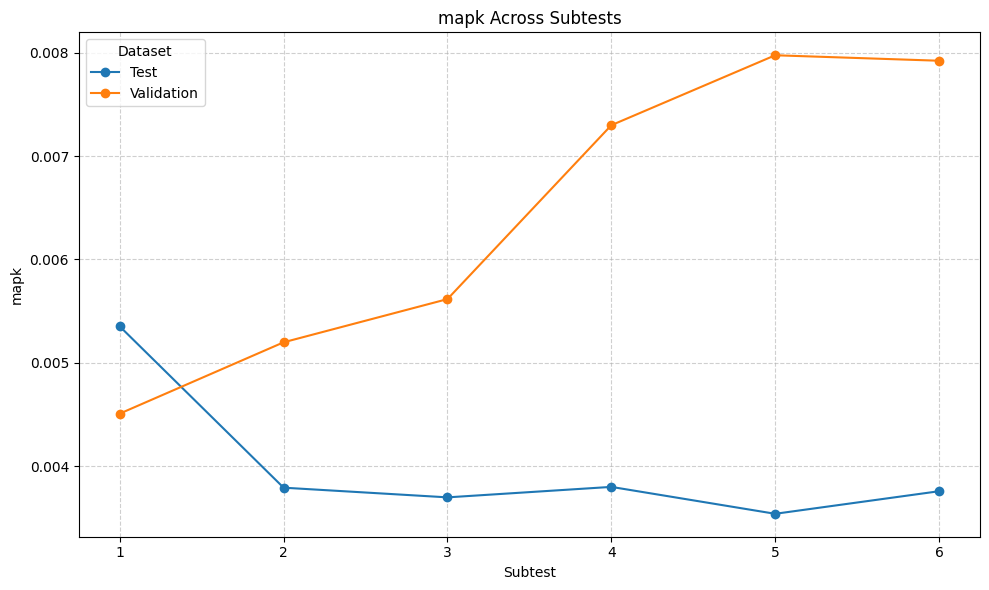

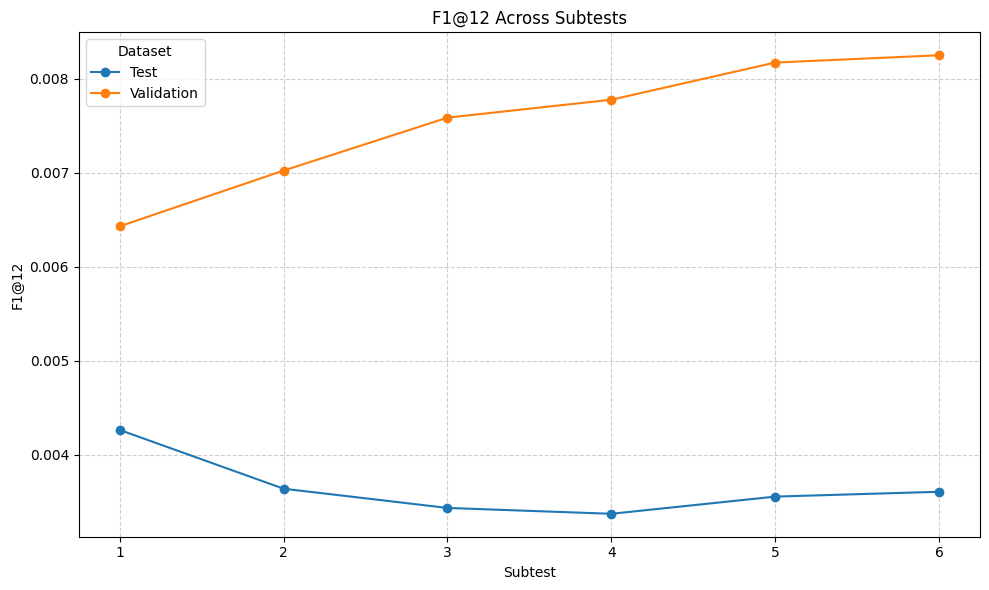

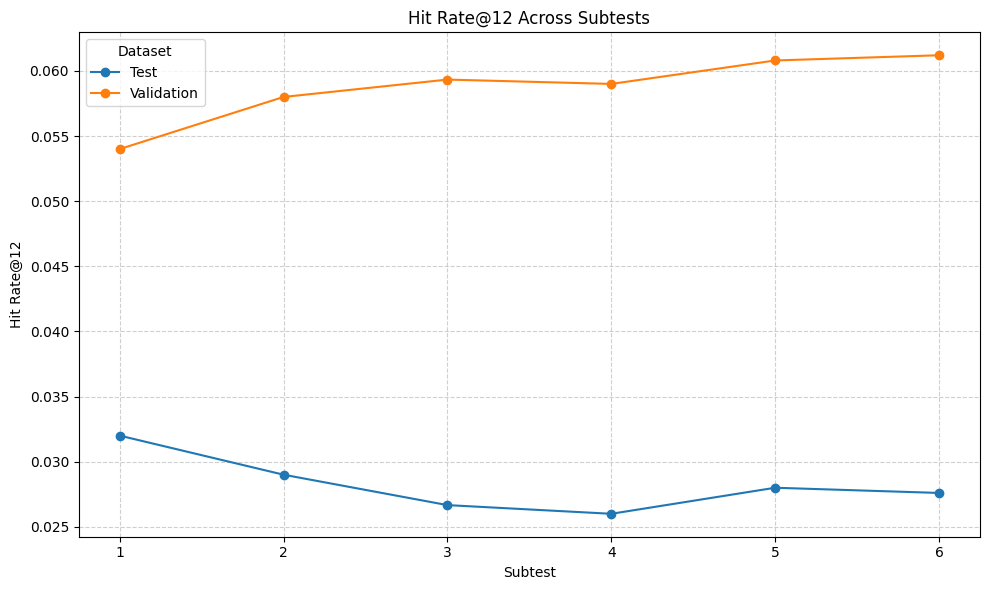

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the filenames
test_files = [f"subtest{i}.csv" for i in range(1, 7)]
val_files = [f"val_subtest{i}.csv" for i in range(1, 7)]

# Define the metrics manually (based on the results you provided)
val_metrics = {
    "val_ subtest1.csv": {"mapk": 0.004507202982202982, "F1@12": 0.0064289122631833616, "Hit Rate@12": 0.054},
    "val_subtest2.csv": {"mapk": 0.005197549903799904, "F1@12": 0.007021178690266575, "Hit Rate@12": 0.058},
    "val_subtest3.csv": {"mapk": 0.005615676607343275, "F1@12": 0.0075841276917129495, "Hit Rate@12": 0.059333333333333335},
    "val_subtest4.csv": {"mapk": 0.0072984893578643606, "F1@12": 0.00777441810939204, "Hit Rate@12": 0.059},
    "val_subtest5.csv": {"mapk": 0.007975642135642136, "F1@12": 0.008169751916993408, "Hit Rate@12": 0.0608},
    "val_subtest6.csv": {"mapk": 0.007922651875901887, "F1@12": 0.008247329645523572, "Hit Rate@12": 0.0612},
}

test_metrics = {
    "subtest1.csv": {"mapk": 0.005351388888888889, "F1@12": 0.00426320117790706, "Hit Rate@12": 0.032},
    "subtest2.csv": {"mapk": 0.003790456349206349, "F1@12": 0.0036386623023232927, "Hit Rate@12": 0.029},
    "subtest3.csv": {"mapk": 0.0036967857142857137, "F1@12": 0.0034341367314793536, "Hit Rate@12": 0.02666666666666667},
    "subtest4.csv": {"mapk": 0.0037980853174603164, "F1@12": 0.0033718967342999864, "Hit Rate@12": 0.026},
    "subtest5.csv": {"mapk": 0.003537705266955267, "F1@12": 0.0035546011767409744, "Hit Rate@12": 0.028},
    "subtest6.csv": {"mapk": 0.00375612463924964, "F1@12": 0.0036060951873150495, "Hit Rate@12": 0.0276},
}

# Combine the data into a DataFrame
data = []

for file, metrics in test_metrics.items():
    data.append({"File": file, "Type": "Test", **metrics})

for file, metrics in val_metrics.items():
    data.append({"File": file, "Type": "Validation", **metrics})

# Create the DataFrame
df = pd.DataFrame(data)

# Save DataFrame for further analysis or debugging
print(df)

# Line Chart Function
def plot_metrics_line(df, metric_name):
    """
    Generate a line chart for a given metric across Test and Validation datasets.
    """
    # Extract data for plotting
    df['Subtest'] = df['File'].str.extract(r'(\d+)').astype(int)
    plot_data = df.pivot(index="Subtest", columns="Type", values=metric_name)

    # Plotting
    plt.figure(figsize=(10, 6))
    for col in plot_data.columns:
        plt.plot(plot_data.index, plot_data[col], marker='o', label=col)

    plt.title(f"{metric_name} Across Subtests")
    plt.xlabel("Subtest")
    plt.ylabel(metric_name)
    plt.xticks(plot_data.index)  # Ensure subtest numbers are shown
    # plt.xlim(500, 5000)
    plt.legend(title="Dataset")
    plt.grid(visible=True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example code for plotting
def plot_metrics(df, metric_name):
    """
    Generate a bar plot for a given metric across Test and Validation datasets.
    """
    import matplotlib.pyplot as plt

    # Pivot data for plotting
    plot_data = df.pivot(index="File", columns="Type", values=metric_name)

    # Plotting
    plot_data.plot(kind="bar", figsize=(12, 6))
    plt.title(f"{metric_name} Across Subtests and Validation")
    plt.ylabel(metric_name)
    plt.xlabel("File")
    plt.legend(title="Type")
    plt.tight_layout()
    plt.show()

# Example usage
plot_metrics_line(df, "mapk")
plot_metrics_line(df, "F1@12")
plot_metrics_line(df, "Hit Rate@12")

In [ ]:
import pandas as pd
subtest_files = [f'/content/drive/MyDrive/CS 7641 Machine Learning Group Project/recommendations_results_{i}.csv' for i in range(1, 7)]
ground_files = [f'/content/drive/MyDrive/CS 7641 Machine Learning Group Project/test{i}.csv' for i in range(1, 7)]

print("KMeans")
for i in range(0, 6):
    print(f"Metrics for subtest{i+1}:")
    calculate_and_print_metrics(ground_files[i], subtest_files[i], 1)


KMeans
Metrics for subtest1:
Metrics for /content/drive/MyDrive/CS 7641 Machine Learning Group Project/test1.csv:
mapk 0.0018522486772486774
F1-score at k=12: 0.0025158376711008285
Hit Rate@12: 0.016
Metrics for subtest2:
Metrics for /content/drive/MyDrive/CS 7641 Machine Learning Group Project/test2.csv:
mapk 0.0012125431106912586
F1-score at k=12: 0.0016646639593115486
Hit Rate@12: 0.012012012012012012
Metrics for subtest3:
Metrics for /content/drive/MyDrive/CS 7641 Machine Learning Group Project/test3.csv:
mapk 0.0019178203917159734
F1-score at k=12: 0.0017477791383009782
Hit Rate@12: 0.012717536813922356
Metrics for subtest4:
Metrics for /content/drive/MyDrive/CS 7641 Machine Learning Group Project/test4.csv:
mapk 0.0013859522320770433
F1-score at k=12: 0.001286173819404525
Hit Rate@12: 0.010568696527428284
Metrics for subtest5:
Metrics for /content/drive/MyDrive/CS 7641 Machine Learning Group Project/test5.csv:
mapk 0.0017168954668954671
F1-score at k=12: 0.0012401135711056694
Hit

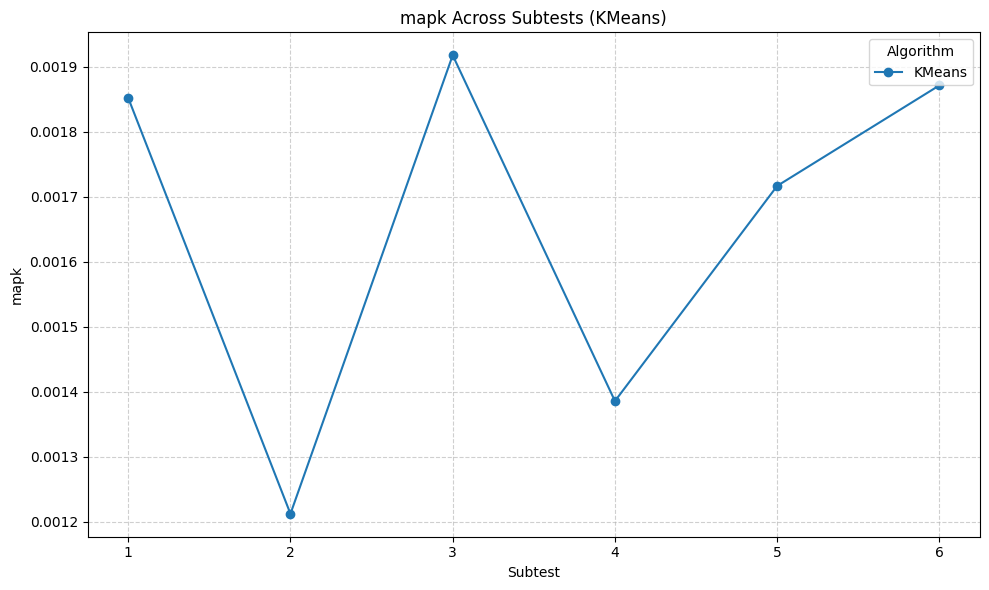

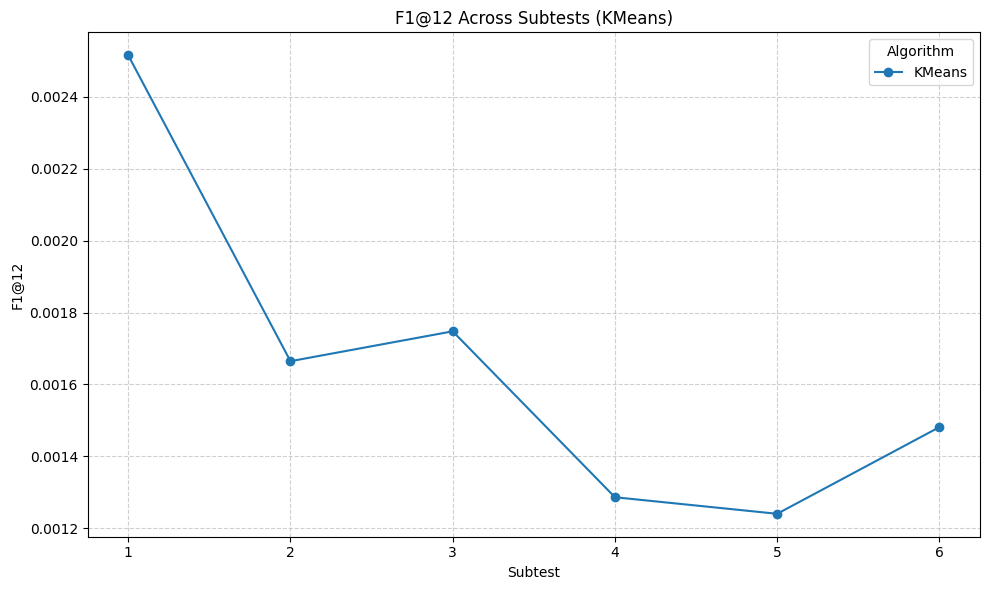

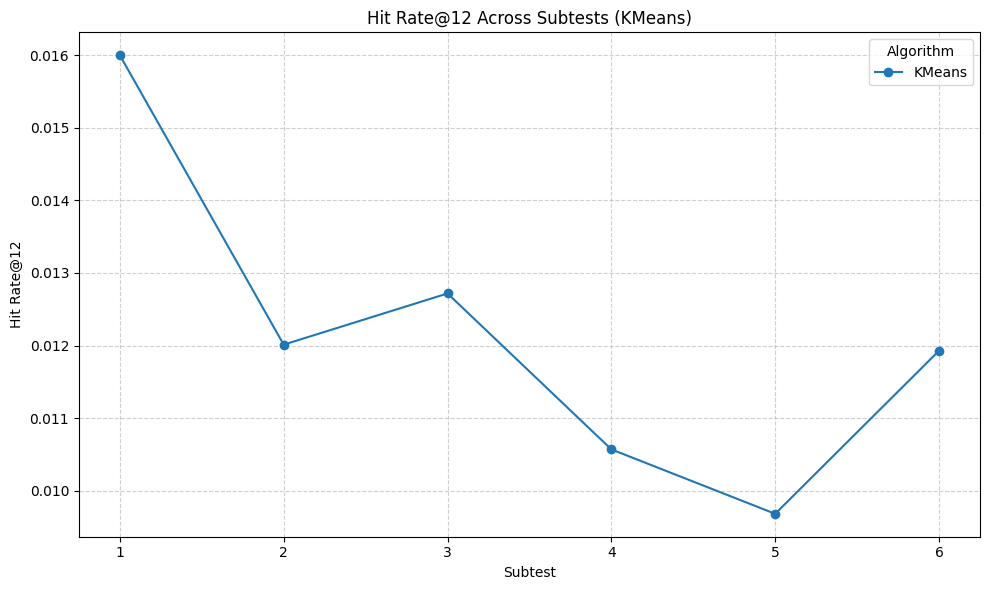

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Organize the KMeans metrics into a dictionary
kmeans_metrics = {
    "subtest1": {"mapk": 0.0018522486772486774, "F1@12": 0.0025158376711008285, "Hit Rate@12": 0.016},
    "subtest2": {"mapk": 0.0012125431106912586, "F1@12": 0.0016646639593115486, "Hit Rate@12": 0.012012012012012012},
    "subtest3": {"mapk": 0.0019178203917159734, "F1@12": 0.0017477791383009782, "Hit Rate@12": 0.012717536813922356},
    "subtest4": {"mapk": 0.0013859522320770433, "F1@12": 0.001286173819404525, "Hit Rate@12": 0.010568696527428284},
    "subtest5": {"mapk": 0.0017168954668954671, "F1@12": 0.0012401135711056694, "Hit Rate@12": 0.009681323114158934},
    "subtest6": {"mapk": 0.0018715493126633443, "F1@12": 0.001481284998623377, "Hit Rate@12": 0.011928831378892033},
}

# Convert to DataFrame for easy manipulation
kmeans_df = pd.DataFrame(kmeans_metrics).T
kmeans_df.index = [1, 2, 3, 4, 5, 6]  # Assign subtest numbers as the index


def plot_kmeans_metrics(df, metric_name):
    """
    Generate a line chart for a given metric across subtests for KMeans.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[metric_name], marker='o', label="KMeans")

    plt.title(f"{metric_name} Across Subtests (KMeans)")
    plt.xlabel("Subtest")
    plt.ylabel(metric_name)
    plt.xticks(df.index, labels=df.index.astype(str))  # Ensure proper xticks for subtest indices
    plt.legend(title="Algorithm")
    plt.grid(visible=True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example usage
plot_kmeans_metrics(kmeans_df, "mapk")
plot_kmeans_metrics(kmeans_df, "F1@12")
plot_kmeans_metrics(kmeans_df, "Hit Rate@12")

LGBM and KNN

In [ ]:
import ast
import pandas as pd

submission_directory = ''
test_dir = ''

testfiles = ['test1.csv', 'test2.csv','test3.csv','test4.csv','test5.csv', 'test6.csv']
for testf in testfiles:
  print("Ground truth file", testf)
  print("Read knn:" + submission_directory+'knn_submission_'+testf)
  test = pd.read_csv(test_dir+testf)
  df_predictionll = pd.read_csv(submission_directory+'knn_submission_'+testf)
  grouped_df = test.groupby('customer_id')['article_id'].apply(list).reset_index()
  df_predictionll['prediction'] = df_predictionll['prediction'].apply(lambda x: x.split())
  common_customers = set(grouped_df['customer_id']).intersection(set(df_predictionll['customer_id']))
  ground_truth = grouped_df[grouped_df['customer_id'].isin(common_customers)]
  predictions = df_predictionll[df_predictionll['customer_id'].isin(common_customers)]

  # Step 2: Align dataframes by customer_id
  ground_truth = ground_truth.sort_values('customer_id').reset_index(drop=True)
  predictions = predictions.sort_values('customer_id').reset_index(drop=True)
  k = 12
  mapk_score = sum(apk(gt, pred, k) for gt, pred in zip(ground_truth['article_id'], predictions['prediction'])) / len(common_customers)
  print("mapk", mapk_score)
  k = 12
  f1_scores = [
      f1_at_k(gt, pred, k)
      for gt, pred in zip(ground_truth['article_id'], predictions['prediction'])
  ]
  f1_at_k_mean = sum(f1_scores) / len(f1_scores)
  print(f"F1-score at k={k}: {f1_at_k_mean}")
  hits = [
      hit_at_k(gt, pred, k)
      for gt, pred in zip(ground_truth['article_id'], predictions['prediction'])
  ]

  hit_rate_at_k = sum(hits) / len(hits)
  print(f"Hit Rate@{k}: {hit_rate_at_k}")

Ground truth file test1.csv
Read knn:knn_submission_test1.csv
mapk 0.5518255363155361
F1-score at k=12: 0.28235499298888883
Hit Rate@12: 0.982
Ground truth file test2.csv
Read knn:knn_submission_test2.csv
mapk 0.5635160094997596
F1-score at k=12: 0.2833084536698908
Hit Rate@12: 0.983
Ground truth file test3.csv
Read knn:knn_submission_test3.csv
mapk 0.5690135903770752
F1-score at k=12: 0.2844525884953938
Hit Rate@12: 0.9813333333333333
Ground truth file test4.csv
Read knn:knn_submission_test4.csv
mapk 0.5721833102489533
F1-score at k=12: 0.2849739831729554
Hit Rate@12: 0.9815
Ground truth file test5.csv
Read knn:knn_submission_test5.csv
mapk 0.5734081195796332
F1-score at k=12: 0.2875346181222671
Hit Rate@12: 0.9828
Ground truth file test6.csv
Read knn:knn_submission_test6.csv
mapk 0.5703341879691558
F1-score at k=12: 0.28543137397371215
Hit Rate@12: 0.98


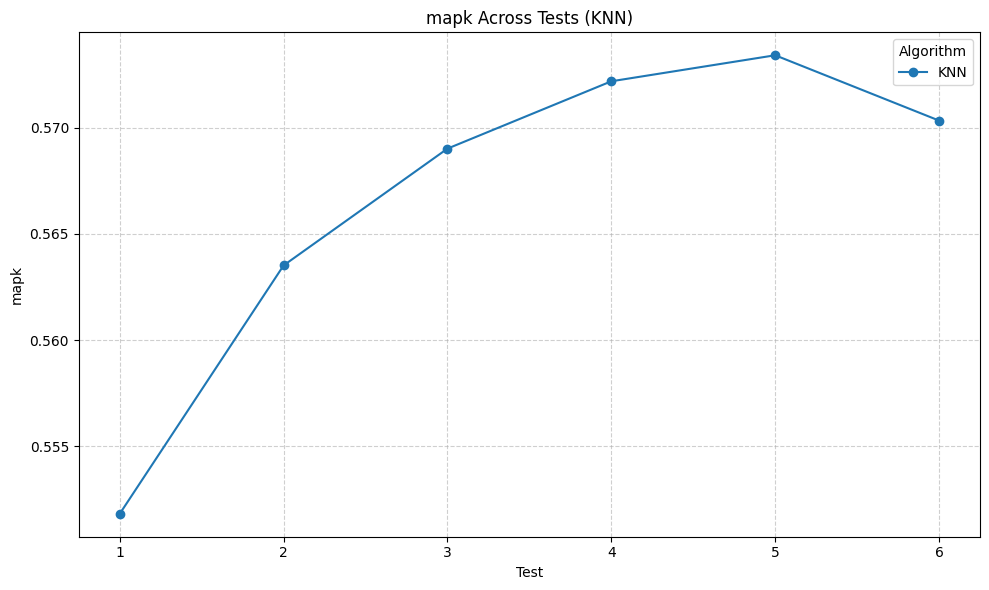

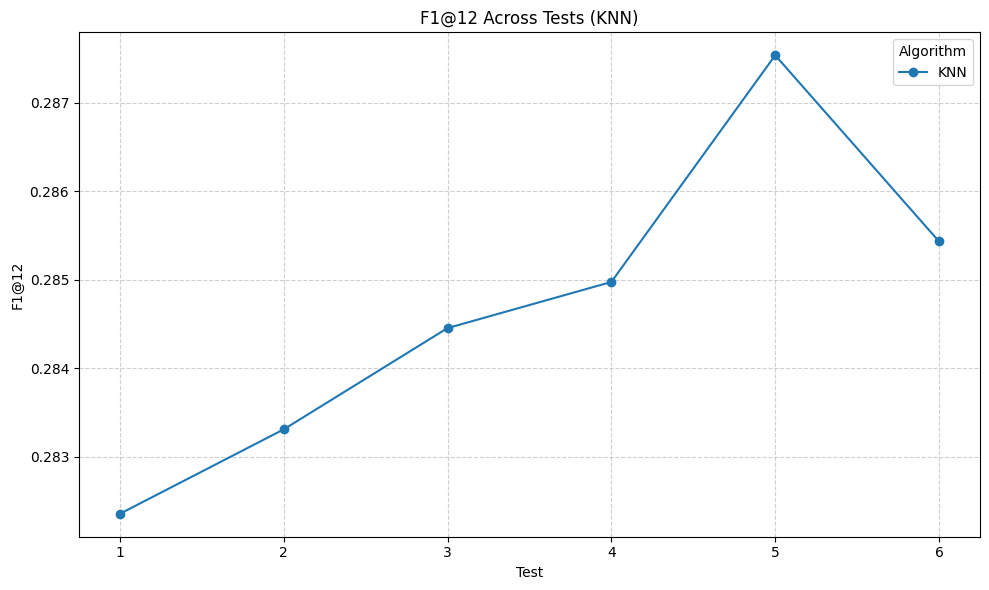

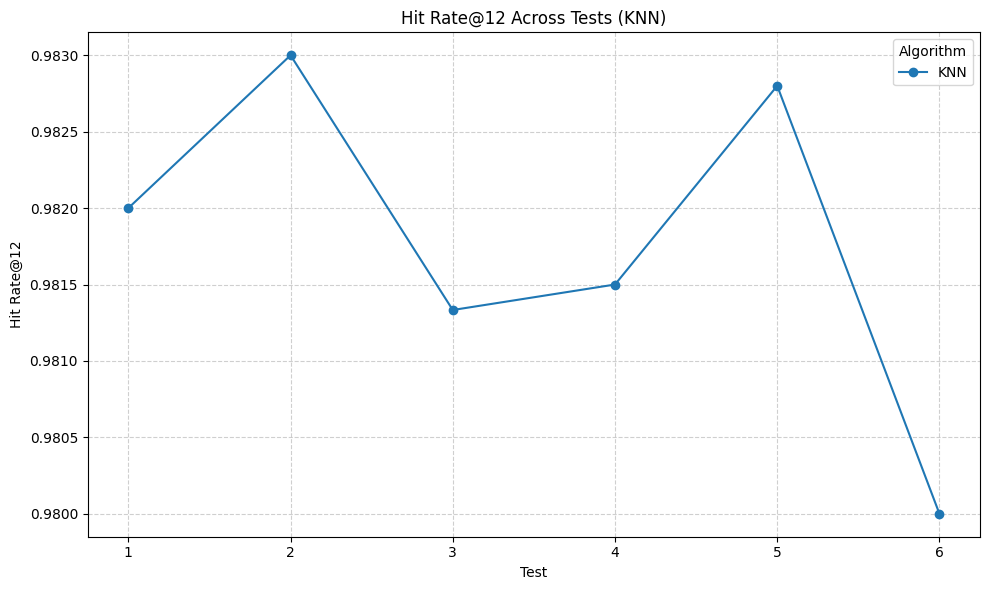

In [1]:
import pandas as pd

# Organize the KNN metrics into a dictionary
knn_metrics = {
    "test1": {"mapk": 0.5518255363155361, "F1@12": 0.28235499298888883, "Hit Rate@12": 0.982},
    "test2": {"mapk": 0.5635160094997596, "F1@12": 0.2833084536698908, "Hit Rate@12": 0.983},
    "test3": {"mapk": 0.5690135903770752, "F1@12": 0.2844525884953938, "Hit Rate@12": 0.9813333333333333},
    "test4": {"mapk": 0.5721833102489533, "F1@12": 0.2849739831729554, "Hit Rate@12": 0.9815},
    "test5": {"mapk": 0.5734081195796332, "F1@12": 0.2875346181222671, "Hit Rate@12": 0.9828},
    "test6": {"mapk": 0.5703341879691558, "F1@12": 0.28543137397371215, "Hit Rate@12": 0.98},
}

# Convert to DataFrame for easy manipulation
knn_df = pd.DataFrame(knn_metrics).T
knn_df.index = [1, 2, 3, 4, 5, 6]  # Assign test numbers as the index

import matplotlib.pyplot as plt

def plot_knn_metrics(df, metric_name):
    """
    Generate a line chart for a given metric across tests for KNN.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[metric_name], marker='o', label="KNN")

    plt.title(f"{metric_name} Across Tests (KNN)")
    plt.xlabel("Test")
    plt.ylabel(metric_name)
    plt.xticks(df.index, labels=df.index.astype(str))  # Ensure proper xticks for test indices
    plt.legend(title="Algorithm")
    plt.grid(visible=True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example usage
plot_knn_metrics(knn_df, "mapk")
plot_knn_metrics(knn_df, "F1@12")
plot_knn_metrics(knn_df, "Hit Rate@12")

In [ ]:
import ast
import pandas as pd

submission_directory = ''
test_dir = ''

testfiles = ['test1.csv', 'test2.csv','test3.csv','test4.csv','test5.csv', 'test6.csv']
for testf in testfiles:
  print("Ground truth file", testf)
  print("Read lgbm:" + submission_directory+'lgbm_submission_'+testf)
  test = pd.read_csv(test_dir+testf)
  df_predictionll = pd.read_csv(submission_directory+'lgbm_submission_'+testf)
  grouped_df = test.groupby('customer_id')['article_id'].apply(list).reset_index()
  df_predictionll['prediction'] = df_predictionll['prediction'].apply(lambda x: x.split())
  common_customers = set(grouped_df['customer_id']).intersection(set(df_predictionll['customer_id']))
  ground_truth = grouped_df[grouped_df['customer_id'].isin(common_customers)]
  predictions = df_predictionll[df_predictionll['customer_id'].isin(common_customers)]

  # Step 2: Align dataframes by customer_id
  ground_truth = ground_truth.sort_values('customer_id').reset_index(drop=True)
  predictions = predictions.sort_values('customer_id').reset_index(drop=True)
  k = 12
  mapk_score = sum(apk(gt, pred, k) for gt, pred in zip(ground_truth['article_id'], predictions['prediction'])) / len(common_customers)
  print("mapk", mapk_score)
  k = 12
  f1_scores = [
      f1_at_k(gt, pred, k)
      for gt, pred in zip(ground_truth['article_id'], predictions['prediction'])
  ]
  f1_at_k_mean = sum(f1_scores) / len(f1_scores)
  print(f"F1-score at k={k}: {f1_at_k_mean}")
  hits = [
      hit_at_k(gt, pred, k)
      for gt, pred in zip(ground_truth['article_id'], predictions['prediction'])
  ]

  hit_rate_at_k = sum(hits) / len(hits)
  print(f"Hit Rate@{k}: {hit_rate_at_k}")

Ground truth file test1.csv
Read knn:lgbm_submission_test1.csv
mapk 0.7721667971953088
F1-score at k=12: 0.33657637647130634
Hit Rate@12: 1.0
Ground truth file test2.csv
Read knn:lgbm_submission_test2.csv
mapk 0.773840189751827
F1-score at k=12: 0.33751924385591486
Hit Rate@12: 0.999
Ground truth file test3.csv
Read knn:lgbm_submission_test3.csv
mapk 0.7715772582495414
F1-score at k=12: 0.3376430001059175
Hit Rate@12: 0.998
Ground truth file test4.csv
Read knn:lgbm_submission_test4.csv
mapk 0.7740398116855792
F1-score at k=12: 0.33804908790694976
Hit Rate@12: 0.998
Ground truth file test5.csv
Read knn:lgbm_submission_test5.csv
mapk 0.7777391966521543
F1-score at k=12: 0.3419695947918006
Hit Rate@12: 0.9972
Ground truth file test6.csv
Read knn:lgbm_submission_test6.csv
mapk 0.7755115669545894
F1-score at k=12: 0.3438489133820859
Hit Rate@12: 0.998


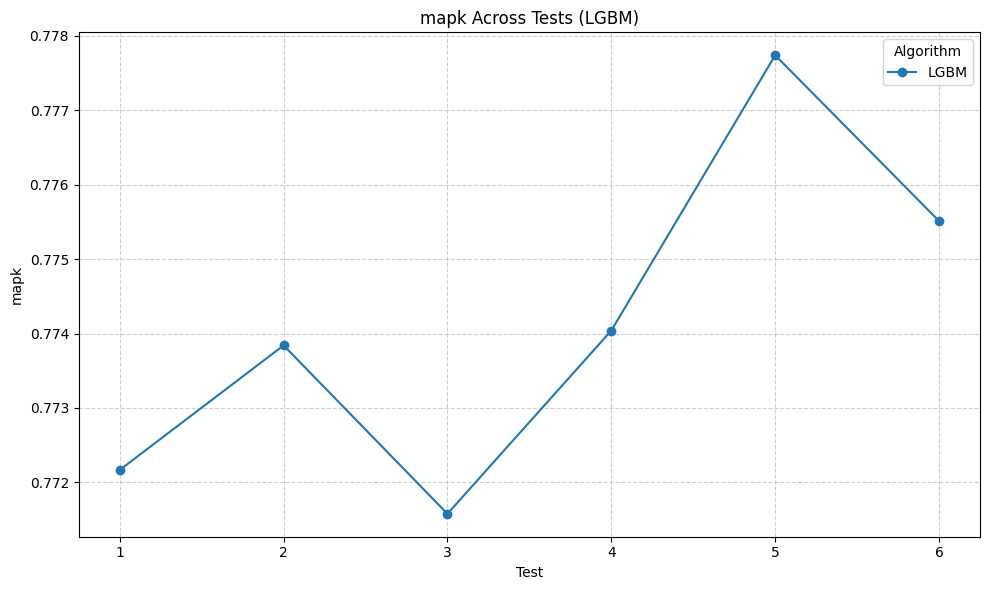

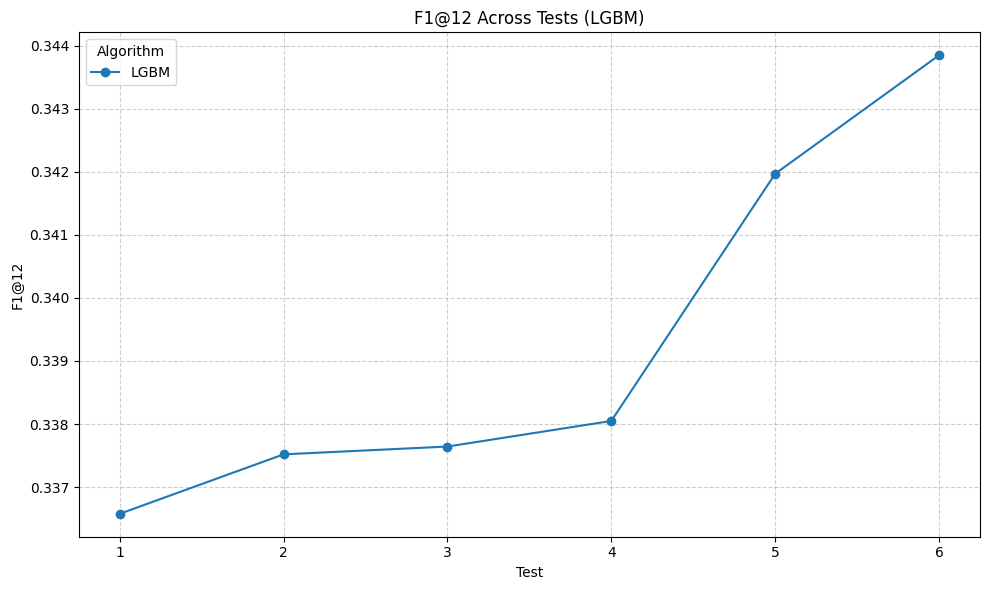

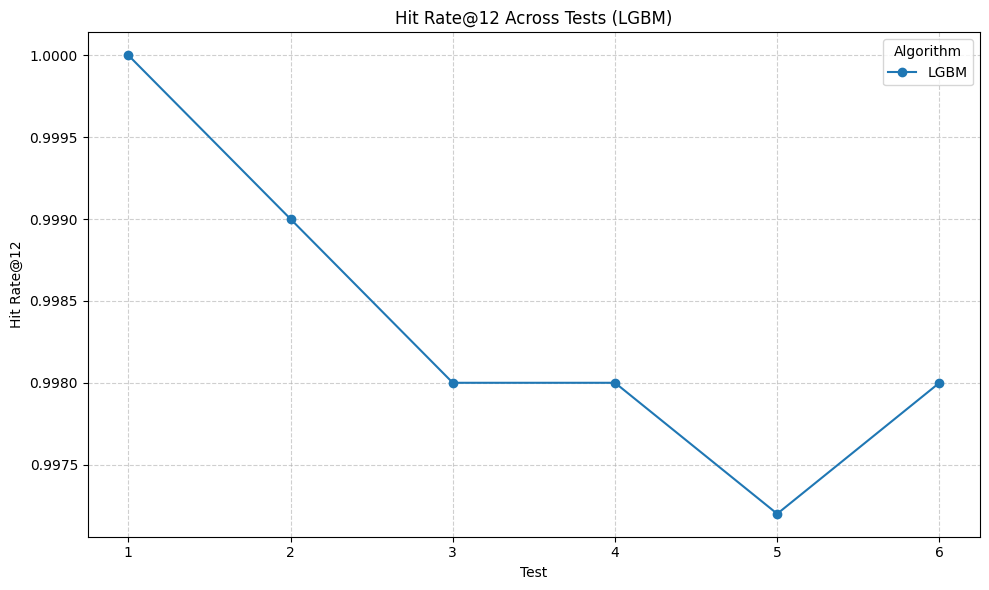

In [2]:
import pandas as pd

# Organize the LGBM metrics into a dictionary
lgbm_metrics = {
    "test1": {"mapk": 0.7721667971953088, "F1@12": 0.33657637647130634, "Hit Rate@12": 1.0},
    "test2": {"mapk": 0.773840189751827, "F1@12": 0.33751924385591486, "Hit Rate@12": 0.999},
    "test3": {"mapk": 0.7715772582495414, "F1@12": 0.3376430001059175, "Hit Rate@12": 0.998},
    "test4": {"mapk": 0.7740398116855792, "F1@12": 0.33804908790694976, "Hit Rate@12": 0.998},
    "test5": {"mapk": 0.7777391966521543, "F1@12": 0.3419695947918006, "Hit Rate@12": 0.9972},
    "test6": {"mapk": 0.7755115669545894, "F1@12": 0.3438489133820859, "Hit Rate@12": 0.998},
}

# Convert to DataFrame for easy manipulation
lgbm_df = pd.DataFrame(lgbm_metrics).T
lgbm_df.index = [1, 2, 3, 4, 5, 6]  # Assign test numbers as the index

import matplotlib.pyplot as plt

def plot_lgbm_metrics(df, metric_name):
    """
    Generate a line chart for a given metric across tests for LGBM.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[metric_name], marker='o', label="LGBM")

    plt.title(f"{metric_name} Across Tests (LGBM)")
    plt.xlabel("Test")
    plt.ylabel(metric_name)
    plt.xticks(df.index, labels=df.index.astype(str))  # Ensure proper xticks for test indices
    plt.legend(title="Algorithm")
    plt.grid(visible=True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example usage
plot_lgbm_metrics(lgbm_df, "mapk")
plot_lgbm_metrics(lgbm_df, "F1@12")
plot_lgbm_metrics(lgbm_df, "Hit Rate@12")